In [1]:
from IPython.display import display, Markdown, Latex
from decimal import Decimal
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import math as mt

# Solutions to Modern Data Science Problems (problems till 13.11)
by *Nora Salone* 

# Statistics I (recap) 

### Problem 1.1

Tossing two coins: Ω = { HT , TH , HH , TT }.
We define as a random variable which expresses number of heads X(E) = 1 if E = {HT, TH} 0 if E= {TT}, 2 if E = {HH}. What are CDF and PMF functions? Draw it. *


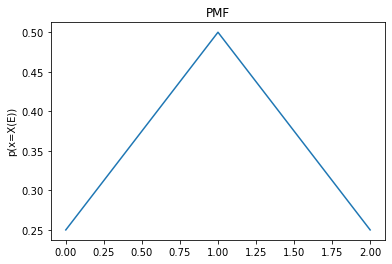

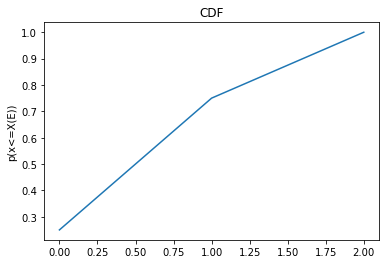

In [82]:
#Assign each event a random discrete variable and its value
data=np.array([["HT", 1],["TH",1],["HH",2],["TT",0]])
classes=3

def PMF(data):
    pmf=np.array([0]*classes)
    for i in range(len(data)):
        if data[i][1]=="0": #specific X(E)
            pmf[0] += 1
        elif data[i][1]=="1":
            pmf[1] += 1
        elif data[i][1]=="2":
            pmf[2] += 1
        #print("i =",i,"data[i][1] =",data[i][1],"pmf =",pmf)
    pmf=pmf/np.sum(pmf)
    return pmf

pmf=PMF(data)
plt.plot(pmf)
plt.ylabel('p(x=X(E))')
plt.title('PMF')
plt.show()

def CDF(data):
    for i in range(3):
        if i in range(1):
            cdf = pmf[0]
        elif i in range(2):
            cdf = pmf[0]+pmf[1]
        elif i in range(3):
            cdf = pmf[0]+ pmf[1]+pmf[2]
        cdf = np.sum(pmf[i])
        #print("cdf=",cdf,"i=",i)
    return cdf

#cdf=CDF(data): this is my attempt to produce a CDF for this set, before finding out np.cumsum
cdf=np.cumsum(pmf)

plt.plot(cdf)
plt.ylabel('p(x<=X(E))')
plt.title('CDF')
plt.show()


### Problem 1.2
What are the PDF and CDF functions for the uniform distribution defined for X =[0, a]? *

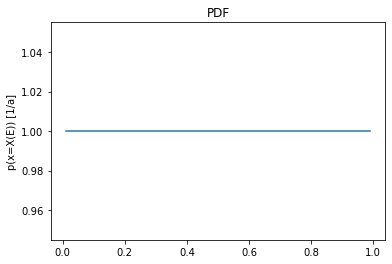

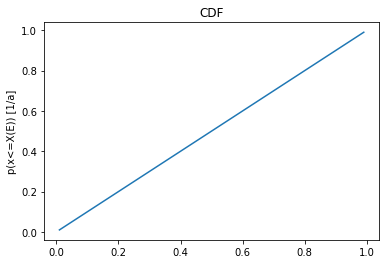

In [95]:
from scipy.stats import uniform
import matplotlib.pyplot as plt

x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100) #our way to represent range[0,a] numerically: normalize over a

plt.plot(x, uniform.pdf(x))
plt.ylabel('p(x=X(E)) [1/a]')
plt.title('PDF')
plt.show()

cdf=np.cumsum(pmf)

plt.plot(x, uniform.cdf(x))
plt.ylabel('p(x<=X(E)) [1/a]')
plt.title('CDF')
plt.show()

### Problem 1.3
Write a program that simulates the tossing of two coins and estimate the CDF and PMF functions for the first problem above *

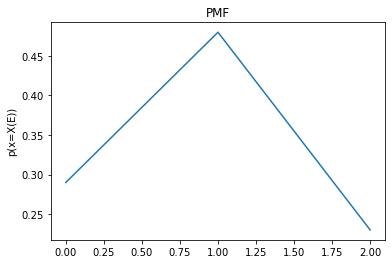

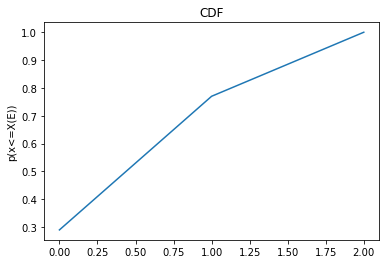

In [178]:
import random

def heads_tails(flips):
    heads = 0
    tails = 0
    for i in range(flips):
        rand = random.randint(0,1)
        if rand == 0:
            tails += 1
        else:
            heads += 1
    return heads
#[heads,tails]
    #print(heads,"heads",tails,"tails")   
    
def toss_coin(flips):
    toss_coin=[]
    for i in range(flips):
        toss = [heads_tails(1),heads_tails(1)]
        #if toss[0]==1:
            #print("first coin=H")
        #else:
            #print("first coin=T")
        #if toss[1]==1:
            #print("second coin=H")
        #else:
            #print("second coin=T")
        sumht = np.sum(toss)#this are our random variable values X(E)=0,1,2
        if sumht==0:
            toss_coin.append(["TT",0])
        elif sumht==2:
            toss_coin.append(["HH",2])
        elif sumht==1:
            if random.randint(1, 2)==1:
                toss_coin.append(["HT",1])
            else:
                toss_coin.append(["TH",1])
    return toss_coin
        
flips=100
data2=np.array(toss_coin(flips))

pmf=PMF(data2)
plt.plot(pmf)
plt.ylabel('p(x=X(E))')
plt.title('PMF')
plt.show()
cdf=np.cumsum(pmf)

plt.plot(cdf)
plt.ylabel('p(x<=X(E))')
plt.title('CDF')
plt.show()

### Problem 1.4

Let g(X) =1 for some set A being a subset of sample space Ω: What is E[g(X)] if X is discrete with a given PMF or continuous with a given PDF *

$g(X):\mathbb{R}\to \mathbb{R}$, $X$ random variable.

probability mass function (PMF) $p_X(k)$ (discrete) $\to$ expected value $E[g(X)] = \sum_{k\in A} p_X(k)g(k)$

probability density function (PDF) $f_X(x)$ (continuous) $\to$ expected value $E[g(X)] = \int_{-\infty}^{\infty}g(x)f_X(x)dx$

For set $A$, $g(X)=1$:

-if $X$ is discrete, $E[g(X)] = \sum_{k\in A} p_X(k) = 1$ by definition, since $g(X)=1$ $\forall k \in A$.

-if $X$ is continuous, $E[g(X)] = \int_{-\infty}^{\infty}f_X(x)dx = 1$ as above; in both cases we have assumed $g(X)=0$ for $x \notin A$, $x \in \Omega$ (sample space).

### Problem 1.5
Calculate the mean and the variance of the uniform distribution *

For a uniform distribution defined for X=[a,b], the PDF is $f_X(x) = \frac{1}{b-a}$ for $a\le x \le b$, 0 elsewhere.

The mean is 

$E[X] = \int_{a}^b x f_X(x) dx = \frac{b^2-a^2}{2(b-a)}=\frac{b+a}{2}$ 

and the mean of the square is 

$E[X^2] = \int_{a}^b x^2 f_X(x) dx = \frac{b^3-a^3}{3(b-a)}=\frac{b^2+ba+a^2}{3}$ 

The variance is $E[X^2]-E[X]^2 =\frac{b^2+ba+a^2}{3}-\frac{(b+a)^2}{4}=\frac{(b-a)^2}{12}$.



### Problem 1.6
Implement a function that returns mean, where X is represented by a list of numbers *

In [198]:
import random

X = []
nel=100 #number of elements in the list
for i in range(nel):
    n = random.randint(1,30)
    X.append(n)

def mean(X):
    mean = sum(X)/len(X)
    return mean
    
print("Mean =",mean(X))


Mean = 16.01


### Problem 1.7
Implement a function that returns Var[X], where X is represented by a list of numbers *

In [219]:
import random

X = []
nel=5 #number of elements in the list
for i in range(nel):
    n = random.randint(1,30)
    X.append(n)
    
def variance1(X):
    diff=[]
    square=[]
    for i in range(nel):
        diff.append(X[i]-mean(X))   
        square.append(diff[i]*diff[i])
    var = mean(square)
    return var

def variance2(X):
    diff=[]
    square=[]
    for i in range(nel):
        square.append(X[i]*X[i])   
    var = mean(square)-mean(X)*mean(X)
    return var

#test using both definitions of variance to see if they are correct
print("Variance1 =",variance1(X))
print("Variance2 =",variance2(X))
  

Variance1 = 26.96
Variance2 = 26.95999999999998


### Problem 1.8
Implement a function that returns Euclidean distance between two vectors represented as a list of numbers. *

In [221]:
import random

nel=5 #number of elements in the list
def randlist(nel): #function to generate random list
    randlist=[]
    for i in range(nel):
        n = random.randint(1,30)
        randlist.append(n)
    return randlist

X=randlist(nel)
Y=randlist(nel)
print(X,Y)
    
def Euclidean_distance(X,Y):
    xx=np.array(X)
    yy=np.array(Y)
    return np.sqrt(np.sum(np.square(xx-yy)))
print("Euclidean distance: ",Euclidean_distance(X,Y))

[18, 12, 17, 20, 12] [29, 9, 15, 8, 29]
Euclidean distance:  23.811761799581316


### Problem 1.9
Implement a function that returns Manhattan distance between two vectors represented as a list of numbers. *

In [223]:
nel=5 #number of elements in the list
X=randlist(nel)
Y=randlist(nel)
print(X,Y)

def Manhattan_distance(X,Y):
    sumli=[]
    xx=np.array(X)
    yy=np.array(Y)
    for i in range(len(X)):
        sumli.append(abs(xx[i]-yy[i]))
    return np.sum(sumli)
print("Manhattan distance: ",Manhattan_distance(X,Y))

[18, 28, 8, 29, 15] [20, 29, 28, 28, 12]
Manhattan distance:  27


# Statistics II (recap)

### Problem 2.1
Tossing a coin: Ω = { H, T } and rolling strange die Ω = { 1 , 2 , 3}. If H we roll the die twice if T we roll the die once. Calculate joint PMF. Calculate marginal PMF based on joint ones. Calculate joint and marginal CDF. Write a program that estimates the PMFs distributions.

### Problem 2.2

Let X be uniform in (-1,1) and Y = X*X. Check if X and Y are correlated. Check if X and Y are independent.

### Problem 2.3

Implement a function that returns Cov[X,Y]

### Problem 2.4

Implement a function that returns Cosine similarity

### Problem 2.5

Implement a function that returns Pearson correlation coefficient

In [ ]:
#interesting function at least for tests.
#r = np.corrcoef(x, y)